In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data')

In [3]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_feature = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [8]:
df_new = pd.DataFrame(scaled_feature, columns=df.columns[:-1])

In [9]:
df_new.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_new.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ'],
      dtype='object')

In [12]:
X = df_new[['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF','HQE', 'NXJ']]
y = df['TARGET CLASS']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 40)

In [14]:
from sklearn.neighbors import KNeighborsClassifier 

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
predictions = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       165
           1       0.89      0.91      0.90       165

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330

[[146  19]
 [ 15 150]]


In [20]:
#now we find error for K values range 1-40

In [21]:
error = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    predictions_i = knn.predict(X_test)
    error.append(np.mean(predictions_i != y_test))

In [22]:
import cufflinks as cf
cf.go_offline()

In [23]:
df = pd.DataFrame({'category' : list(range(1,40,1)), 'values': error})

In [24]:
df.head()

,category,values
0,1,0.103030
1,2,0.103030
2,3,0.075758
3,4,0.069697
4,5,0.063636


Text(0, 0.5, 'Error Rate')

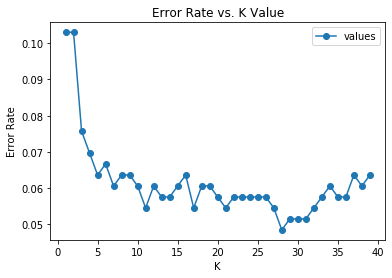

In [25]:
df.plot(x = 'category', y= 'values', kind = 'line', marker = 'o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=8')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=8


[[154  11]
 [ 10 155]]


              precision    recall  f1-score   support

           0       0.94      0.93      0.94       165
           1       0.93      0.94      0.94       165

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



In [28]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=28)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=28')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=28


[[154  11]
 [  5 160]]


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       165
           1       0.94      0.97      0.95       165

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

